<h1>Machine Learning Engineer Nanodegree<h1>
<h1>Capstone Project Report</h1>
<h2>Durgaprasad Rajani</h2>
<h2>Jun 28th 2018</h2>
<p>, In this I am going to find the quality of red wine.Good quality of wine makes health good.In some cases the quality does not meet standards.The companies should maintain the belief of the customers.The belief can be achieved from the quality of the product.
Every company invest lot of money for preparing wine.So, it is crucial for them to make a quality of wine.Redwine also preferable by some doctors.There is a belief that it lowers the chances of occurring heartattack or heartstrokes.So,I classify the wine quality as good and bad by giving some quality limit.By using all these features which are involved in wine making helpful for deciding the wine quality.</p1>

In [271]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("winequality-red.csv")

In [272]:
# Success - Display the first record
display(data.head(n=5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [273]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<h2>Data Exploration</h2>

In [274]:
len(data)
#len(data.columns)

1599

In [275]:
len(data.columns)

12

In [276]:
quality=data['quality']
features=data.drop('quality',axis=1)
print(features)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

In [277]:
#minimum quality
min_quality=np.min(quality)
#maximum quality
max_quality=np.max(quality)
#mean of quality
mean_quality=np.mean(quality)
#median quality
median_quality=np.median(quality)
#standard deviation of quality data
std_quality=np.std(quality)
print("Minimum Quality: ${}".format(min_quality)) 
print("Maximum Quality: ${}".format(max_quality))
print("Mean Quality: ${}".format(mean_quality))
print("Median Quality ${}".format(median_quality))
print("Standard deviation of Quality: ${}".format(std_quality))

Minimum Quality: $3
Maximum Quality: $8
Mean Quality: $5.6360225140712945
Median Quality $6.0
Standard deviation of Quality: $0.8073168769639486


<h2>Features Description</h2>
<p>
<ul>
    <li>fixed acidity – It is non-volatile acid in the wine
<li>volatile acidity – It is amount of acetic acid in the wine
<li>citric acid – It is the amount of citric acid in the wine
<li>residual sugar – It is the amount of sugar remained after the fermentation process
<li>chlorides – It is the salt content in wine
<li>free sulfur dioxide – It is amount of free sulfur dioxide present in wine as gas form
<li>total sulfur dioxide – It is the amount of free and bound forms of sulfur dioxide
<li>density – It is the density of water that is close to that  of water depending on the percent of alcohol and sugar content
<li>pH – It is the value for representing how much it is acidic or basic nature
<li>sulphates – It is the amount of sulphates in wine
<li>alcohol – It is the percent of alcohol content in wine</ul>
</p>

<h2>Data Visualization</h2>

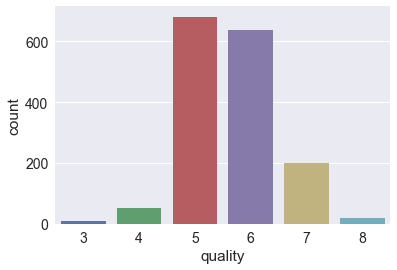

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(quality)
plt.show()

Text(0.5,1,'Heatmap of Correlation Matrix')

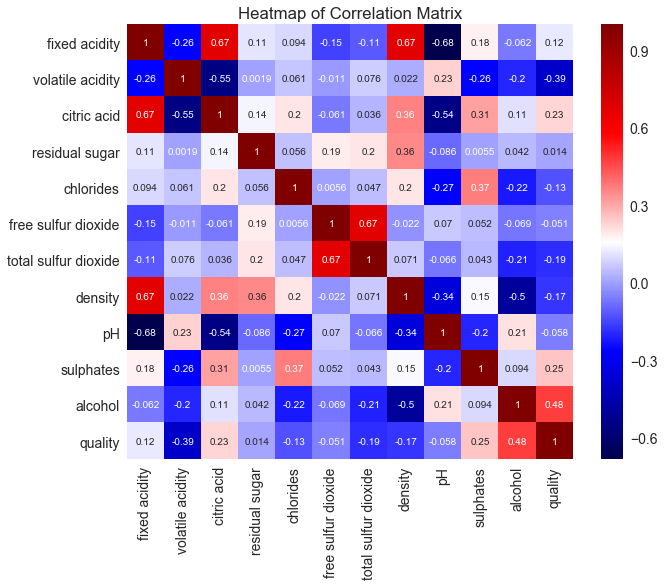

In [279]:
# Visualize skewed continuous features of original data
fig = plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='seismic',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

C:\Users\prasad\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


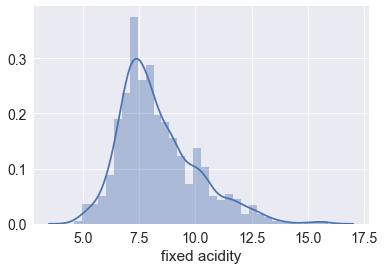

In [280]:

sns.distplot(data['fixed acidity'])
plt.show()

C:\Users\prasad\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


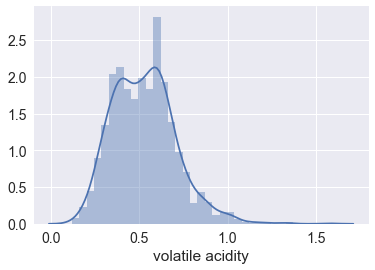

In [281]:
sns.distplot(data['volatile acidity'])
plt.show()

C:\Users\prasad\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


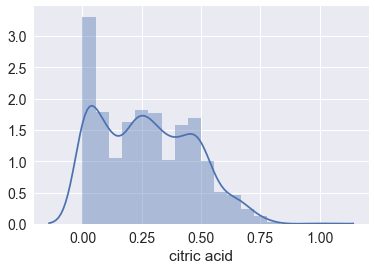

In [282]:
sns.distplot(data['citric acid'])
plt.show()

C:\Users\prasad\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


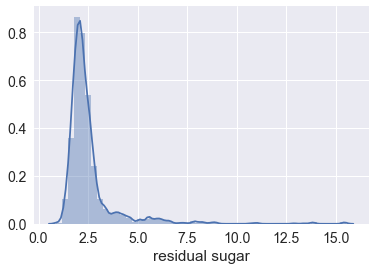

In [283]:
sns.distplot(data['residual sugar'])
plt.show()

C:\Users\prasad\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


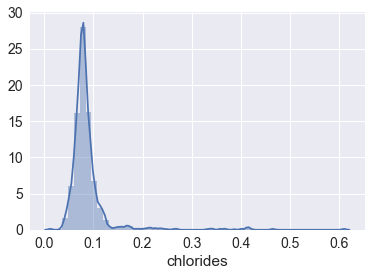

In [284]:
sns.distplot(data['chlorides'])
plt.show()

C:\Users\prasad\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


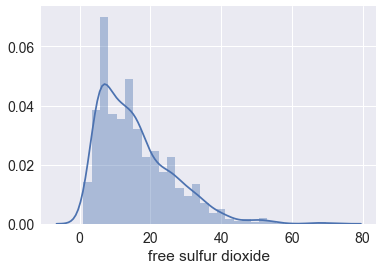

In [285]:
sns.distplot(data['free sulfur dioxide'])
plt.show()

C:\Users\prasad\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


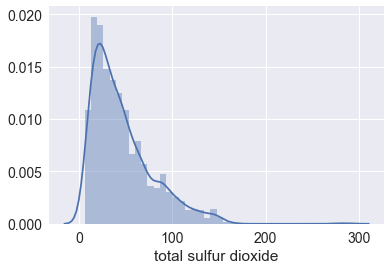

In [286]:
sns.distplot(data['total sulfur dioxide'])
plt.show()

C:\Users\prasad\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


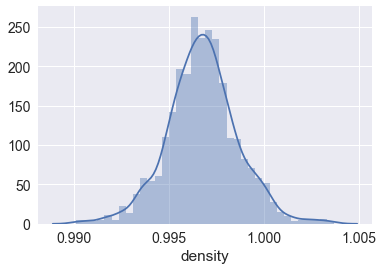

In [287]:
sns.distplot(data['density'])
plt.show()

C:\Users\prasad\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


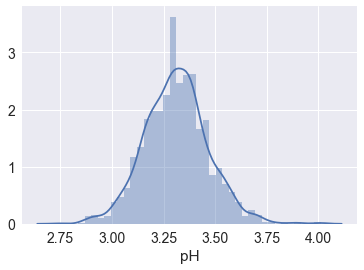

In [288]:
sns.distplot(data['pH'])
plt.show()

C:\Users\prasad\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


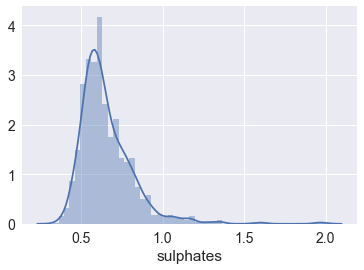

In [289]:
sns.distplot(data['sulphates'])
plt.show()

C:\Users\prasad\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


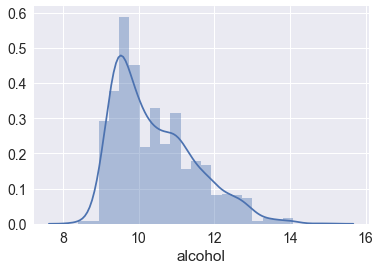

In [290]:
sns.distplot(data['alcohol'])
plt.show()

In [291]:
quality=quality.apply(lambda x:1 if x>=7 else 0)

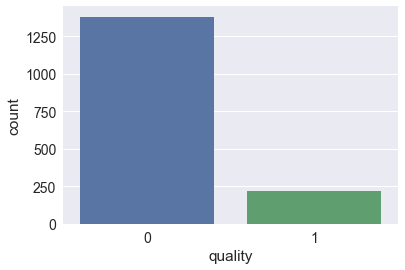

In [292]:
sns.countplot(quality)

In [293]:
quality.unique()

array([0, 1], dtype=int64)

In [294]:
features.shape

(1599, 11)

<h2>Data Preprocessing</h2>

In [295]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)

In [296]:
print(features)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


<h2>Spli data</h2>
<p>Splitting the data into 80% training and 20% testing</p>

In [341]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(features,quality, test_size = 0.2, random_state = 42,stratify=quality)

In [342]:
def score_classifier(y_true, y_pred):
    return f1_score(
        y_true, y_pred,
        average='macro', #Calculate metrics for each label, and find their unweighted mean.
        #This does not take label imbalance into account.
    )

<h2>Implementation</h2>

In [371]:
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
rfc=RandomForestClassifier(n_estimators=210,random_state=0)
rfc.fit(X_train,y_train)
pre_rfc=rfc.predict(X_test)

In [372]:
#print(classification_report(y_test,pre_rfc))
print("F1 score is {}".format(score_classifier(y_test,pre_rfc)))

F1 score is 0.8685704621777681


In [373]:
from sklearn.svm import SVC
#ada=AdaBoostClassifier(random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [374]:
#print(classification_report(y_test,pred_svc))
print(score_classifier(y_test,pred_svc))
#score_classifier(y_test,pred_ada)

0.7222222222222222


<h2>Using Grid search</h2>

In [390]:
from sklearn.model_selection import KFold
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
#parameters = { 'n_estimators': [80, 90, 100, 110], 'learning_rate' :[.70, .80, .90, .95] }
kfold = KFold(n_splits=10, shuffle=True, random_state=10)
for train_index, test_index in kfold.split(features):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = features[train_index], features[test_index] 
      y_train, y_test = quality[train_index], quality[test_index]
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=kfold)

Train: [   0    1    2 ... 1596 1597 1598] Validation: [  31   34   35   36   56   64   67   74   85   87   97  102  115  120
  123  125  130  143  191  203  212  217  218  220  244  264  270  273
  299  317  318  323  339  359  361  366  367  370  379  383  384  417
  421  426  428  449  450  470  475  481  518  524  532  544  555  567
  576  588  596  619  625  643  649  661  672  684  691  695  700  703
  707  721  738  756  761  773  841  842  855  861  863  874  876  894
  895  907  924  980  982  986  987 1056 1059 1062 1063 1085 1087 1090
 1092 1094 1118 1121 1126 1128 1133 1134 1140 1155 1156 1190 1200 1246
 1254 1293 1306 1316 1317 1324 1325 1328 1333 1343 1348 1350 1372 1375
 1392 1401 1418 1431 1432 1437 1439 1443 1448 1449 1450 1458 1459 1461
 1465 1475 1484 1490 1497 1504 1510 1511 1518 1525 1527 1529 1534 1545
 1550 1556 1559 1571 1579 1584]
Train: [   0    2    3 ... 1594 1596 1598] Validation: [   1    7   16   27   28   29   48   69   75   96  109  112  124  126
  131 

In [376]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [377]:
best=grid_svc.best_params_

In [378]:
svc = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc.fit(X_train, y_train)
pre_svc = svc.predict(X_test)
#print(classification_report(y_test, pre_svc))
#pred=best.predict(X_test)
#print(score_classifier(y_test,pred))
score_classifier(y_test,pre_svc)

0.7678312311641924

In [379]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(penalty=None,random_state=0)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

C:\Users\prasad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [380]:
#print(classification_report(y_test,pred_sgd))
score_classifier(y_test,pred_sgd)

0.5270270270270271

In [381]:
eclf1 = VotingClassifier(estimators=[('lr', rfc), ('rf', svc), ('gnb', sgd)], voting='hard')

In [382]:
eclf1.fit(X_train,y_train)
eclf1_pred=eclf1.predict(X_test)

C:\Users\prasad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\prasad\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [383]:
score_classifier(y_test,eclf1_pred)

0.7916666666666667

In [384]:
dict_models={'RForest':0.86,'Svc':0.72,'TunSvc':0.76,'SGdescent':0.52,'Ensemble':0.79}

In [385]:
df=pd.DataFrame.from_dict(dict_models,orient='index',columns=['score'])
#df = pd.DataFrame(index=dict_models.keys(), data=dict_models.values(), columns=['score'])

In [386]:
df

,score
RForest,0.86
Svc,0.72
TunSvc,0.76
SGdescent,0.52
Ensemble,0.79


<h2>Models Comparison</h2>

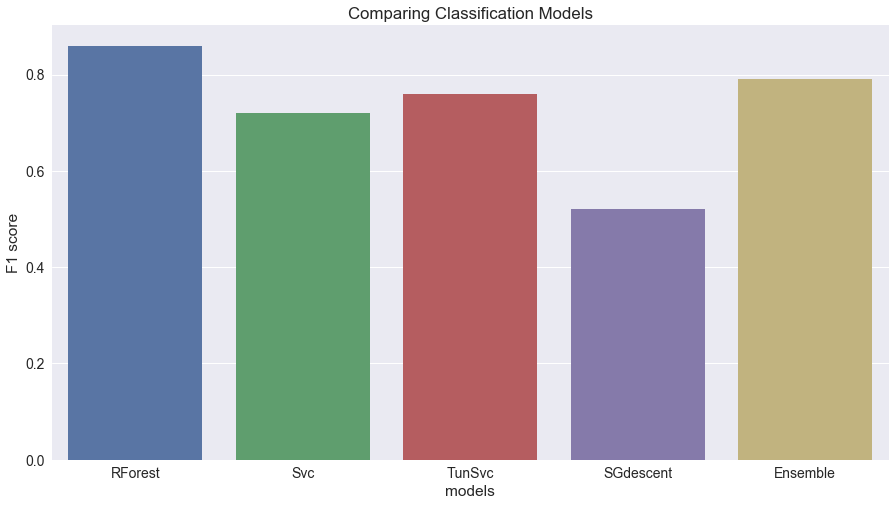

In [387]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,8))
sns.barplot(x=df.index, y=df['score'])
plt.ylabel('F1 score')
plt.xlabel('models')
plt.title('Comparing Classification Models')
plt.show()